
# 1. Charger et visualiser la base de données « Auto Insurance »
La première étape consiste à définir et à explorer la base de données « Auto Insurance » qui décrit l'assurance automobile suédoise. Cette base de données contient une seule variable d'entrée (le nombre de sinistres), et la variable cible (paiement total pour les sinistres en milliers de couronnes suédoises). L'objectif est de prédire le paiement total en fonction du nombre de sinistres.
Vous pouvez en savoir plus sur le dataset ici :
https://www.kaggle.com/datasets/sunmarkil/auto-insurance-in-sweden-small-dataset


## 1.1. Charger la base de données

In [96]:
#charger la dataset
from pandas import read_csv
url = 'https://raw.github.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(url,header=None)
print(df.shape)#charger la dataset



(63, 2)


## 1.2. Afficher les 5 premières lignes de la base de données

In [97]:
df = df.rename(columns={0: 'Nombre de sinistres', 1: 'Payement total'})
df.head()

,Nombre de sinistres,Payement total
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


# 1.3. Statistiques descriptives
Ensuite, nous pouvons en apprendre davantage sur la base de données

In [107]:
#charger la dataset
from pandas import read_csv
url = 'https://raw.github.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(url,header=None)
print(df.describe())

                0           1
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


# 2. Regression

Dans cette partie, on va découvrir un ensemble de modèles de régréssion à savoir la régression linéaire, le réseau de nourones multicouches, et l’arbre de régression.
Nous allons utiliser une simple répartition train/test des données et examiner les graphiques des courbes d'apprentissage. Cela nous aidera à voir si nous sommes en sur-apprentissage ou en sous-apprentissage (over-fitting or under-fitting) ; nous pourrons alors adapter la configuration en conséquence.
Nous pouvons diviser l'ensemble de données en variables d'entrée et de sortie, puis en sous- ensembles de train (67%) et test (33%).

In [109]:
from sklearn.model_selection import train_test_split
#colonnes d'entrée et de sortie
X, y =df.values[:,:-1], df.values[:,-1]
#train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

## 2.1. Régression linéaire

Pour définir le modèle de régression, il suffit de l’importer depuis sklearn package, et l’appeler pour instancier l’objet modèle.
Remarque : Ne rien passer en paramètre vaut l’utilisation des paramètres par défaut.
Plus de détails sur les hyper-paramètres et la méthode sont disponibles dans la documentation
suivant le lien :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [110]:
### Linear regression
from sklearn import linear_model
#train model on data
model = linear_model.LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [111]:
from sklearn.metrics import mean_absolute_error 
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat)
print('MAE : %.3f' %score)

MAE : 24.268


Nous pouvons aussi visualiser les résultats de prédiction dans une figure comme suit :

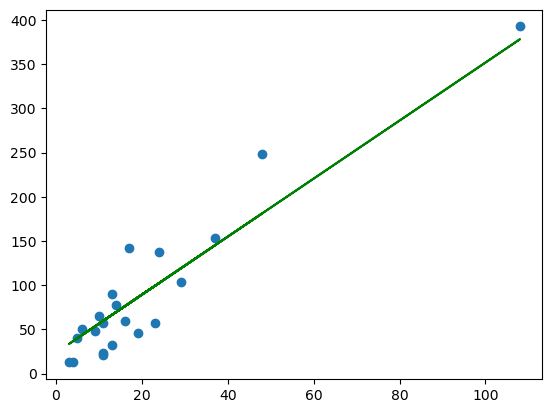

In [112]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat, color="green")
plt.show()

## Question : Qu’est-ce que vous constatez de la figure  ?
 Nous constatons une dispersion plus ou moins   uniforme des points autour de la ligne de regression,avec quelques points  un peu eloignés de cette dernière ce qui peut  indiquer des erreurs de prédiction.
 De plus les points suivent une tendance générale ascendante , ce qui  indique une relation linéaire entre les variables.

## 2.2. Arbre de régression
Maintenant, on va utiliser l’arbre de régression avec l’erreur absolu comme critère pour l’apprentissage. Pour plus de détails sur les hyper-paramètres possible à ajuster, veuillez consultez le lien :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [113]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion= "absolute_error", random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

Et maintenant, on évalue le modèle sur la data du test en utilisant le MAE.

In [115]:
from sklearn.metrics import mean_absolute_error
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat) 
print('MAE : %.3f' %score)

MAE : 28.052


### une recherche des meilleurs hyperparamètres

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à ajuster
hyperparameters = {
    'max_depth': [3, 5, 7, 10, 30, 4, 15, 19, 40, 54, 34],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4,6,34],
    'max_features': ['auto', 'sqrt', None]
}

# Créer le modèle
model = DecisionTreeRegressor(random_state=0)

# Effectuer une recherche par grille pour trouver les meilleures combinaisons d'hyperparamètres
grid_search = GridSearchCV(model, hyperparameters, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle
best_model = DecisionTreeRegressor(random_state=0, **best_params)
best_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec le meilleur modèle
yhat = best_model.predict(X_test)

# Évaluer les prédictions
score = mean_absolute_error(y_test, yhat)
print('MAE : %.3f' % score)


Meilleurs hyperparamètres: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
MAE : 30.158


## 2.3. Réseau de neurones multicouches

Dans cette partie, nous allons développer un modèle de multilayers perceptron (MLP) pour notre base de données en utilisant Scikit-Learn. On va commencer par le MPL avec holdout, puis MLP avec cross validation et finalement MLP avec grid search pour le tuning des hyper- paramètres.

## a. MLP avec holdout
Maintenant on va construire notre modèle MLP en utilisant les hyper-paramètres suivants :

1-Les couches cachées (hidden layer). Les dimensions des couches d’entrée et de sortie sont automatiquement définies.

2- La fonction d'activation ReLU.

3-Nous ajusterons le modèle pour 1000 époques d'apprentissage (max_iter).

4-L'utilisation de la version Adam de la descente de gradient stochastique.

In [117]:
#MLP
from sklearn.neural_network import MLPRegressor
#train model on data
model = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam' , verbose='True', max_iter= 1000)
model.fit(X_train, y_train)

Iteration 1, loss = 9324.41892745
Iteration 2, loss = 9282.92328926
Iteration 3, loss = 9241.48308123
Iteration 4, loss = 9200.07984327
Iteration 5, loss = 9158.69839118
Iteration 6, loss = 9117.36790683
Iteration 7, loss = 9076.02918055
Iteration 8, loss = 9034.58725742
Iteration 9, loss = 8993.15205708
Iteration 10, loss = 8951.65955526
Iteration 11, loss = 8910.22832064
Iteration 12, loss = 8868.85952507
Iteration 13, loss = 8827.55661827
Iteration 14, loss = 8786.32290923
Iteration 15, loss = 8745.16118473
Iteration 16, loss = 8704.07371128
Iteration 17, loss = 8663.06230920
Iteration 18, loss = 8622.12842915
Iteration 19, loss = 8581.27321685
Iteration 20, loss = 8540.49742354
Iteration 21, loss = 8499.80167267
Iteration 22, loss = 8459.18663149
Iteration 23, loss = 8418.65264658
Iteration 24, loss = 8378.19993091
Iteration 25, loss = 8337.82858113
Iteration 26, loss = 8297.53859206
Iteration 27, loss = 8257.32986907
Iteration 28, loss = 8217.20223859
Iteration 29, loss = 8177.155

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes={30}, max_iter=1000, verbose='True')

Pour l’évaluation du modèle, on utilise le MAE.

In [118]:
from sklearn.metrics import mean_absolute_error 
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat) 
print('MAE : %.3f' %score)

MAE : 23.973


## Question : Comparer le MAE des trois méthodes et discuter les résultats.

Régression linéaire : MAE :24.268

Arbre de régression:MAE : 28.052

Réseau de neurones multicouches avec MLP avec holdout:MAE : 23.973


### Comparaison et discussion

En comparant les résultats du MAE pour les trois méthodes, nous constatons que la régression linéaire a un MAE de 24.268, l'arbre de régression a un MAE de 28.052, et le réseau de neurones multicouches MLP a un MAE de 23.973.



Ces résultats indiquent que le réseau de neurones multicouches MLP avec holdout a la plus petite erreur absolue moyenne, suivi de près par la régression linéaire, tandis que l'arbre de régression a la plus grande erreur absolue moyenne.


Cela suggère que le réseau de neurones multicouches MLP avec holdout a la capacité de capturer des relations plus complexes entre les variables que la régression linéaire et l'arbre de régression. Cela peut être dû à la flexibilité du réseau de neurones multicouches MLP pour modéliser des relations non linéaires et des interactions complexes entre les variables.



## b. MLP avec cross validation

La procédure de validation croisée (k-fold cross validation) peut fournir une estimation plus fiable des performances des MLP. Nous pouvons utiliser la méthode « cross_validate » pour créer les divisions, ajuster le modèle, l'évaluer, puis rapporter la moyenne des scores d'évaluation à la fin de la procédure (Figure 12).

In [122]:
from sklearn.model_selection import cross_validate
model = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam' , verbose='True', max_iter= 1000)
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, scoring=('r2', 'neg_mean_absolute_error'))

Iteration 1, loss = 6895.79317132
Iteration 2, loss = 6873.95067969
Iteration 3, loss = 6852.17292662
Iteration 4, loss = 6830.46876293
Iteration 5, loss = 6808.83987322
Iteration 6, loss = 6787.28401812
Iteration 7, loss = 6765.79894961
Iteration 8, loss = 6744.38138786
Iteration 9, loss = 6723.02008893
Iteration 10, loss = 6701.72080469
Iteration 11, loss = 6680.47561675
Iteration 12, loss = 6659.30316620
Iteration 13, loss = 6638.18986200
Iteration 14, loss = 6617.09803751
Iteration 15, loss = 6596.05823793
Iteration 16, loss = 6575.08627433
Iteration 17, loss = 6554.18168671
Iteration 18, loss = 6533.34802129
Iteration 19, loss = 6512.58248896
Iteration 20, loss = 6491.88538487
Iteration 21, loss = 6471.26522042
Iteration 22, loss = 6450.71559923
Iteration 23, loss = 6430.23525445
Iteration 24, loss = 6409.82408518
Iteration 25, loss = 6389.48191476
Iteration 26, loss = 6369.20852857
Iteration 27, loss = 6349.01074728
Iteration 28, loss = 6328.88575304
Iteration 29, loss = 6308.830

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 330, loss = 1126.96479421
Iteration 331, loss = 1119.75543460
Iteration 332, loss = 1112.66638077
Iteration 333, loss = 1105.69639165
Iteration 334, loss = 1098.84422194
Iteration 335, loss = 1092.10862246
Iteration 336, loss = 1085.48834060
Iteration 337, loss = 1078.98211592
Iteration 338, loss = 1072.58868290
Iteration 339, loss = 1066.30679153
Iteration 340, loss = 1060.13530061
Iteration 341, loss = 1054.07261316
Iteration 342, loss = 1048.11779481
Iteration 343, loss = 1042.26945873
Iteration 344, loss = 1036.52633884
Iteration 345, loss = 1030.88717933
Iteration 346, loss = 1025.35077053
Iteration 347, loss = 1019.91579756
Iteration 348, loss = 1014.58098446
Iteration 349, loss = 1009.34506763
Iteration 350, loss = 1004.20678530
Iteration 351, loss = 999.16487788
Iteration 352, loss = 994.21808826
Iteration 353, loss = 989.36516546
Iteration 354, loss = 984.60485667
Iteration 355, loss = 979.93591265
Iteration 356, loss = 975.35708943
Iteration 357, loss = 970.86714714

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 167, loss = 4325.67300663
Iteration 168, loss = 4293.24217304
Iteration 169, loss = 4260.90756352
Iteration 170, loss = 4228.67113409
Iteration 171, loss = 4196.53482052
Iteration 172, loss = 4164.50053928
Iteration 173, loss = 4132.57018839
Iteration 174, loss = 4100.74564801
Iteration 175, loss = 4069.02878100
Iteration 176, loss = 4037.42143326
Iteration 177, loss = 4005.92543403
Iteration 178, loss = 3974.54259605
Iteration 179, loss = 3943.27471570
Iteration 180, loss = 3912.12357301
Iteration 181, loss = 3881.09093165
Iteration 182, loss = 3850.17853887
Iteration 183, loss = 3819.38812538
Iteration 184, loss = 3788.72140517
Iteration 185, loss = 3758.18007539
Iteration 186, loss = 3727.76581609
Iteration 187, loss = 3697.48029002
Iteration 188, loss = 3667.32514236
Iteration 189, loss = 3637.30200046
Iteration 190, loss = 3607.41247358
Iteration 191, loss = 3577.65815257
Iteration 192, loss = 3548.04060949
Iteration 193, loss = 3518.56139720
Iteration 194, loss = 3489.2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 9689.68056637
Iteration 10, loss = 9654.46148923
Iteration 11, loss = 9619.36103149
Iteration 12, loss = 9584.37952698
Iteration 13, loss = 9549.51484186
Iteration 14, loss = 9514.77005189
Iteration 15, loss = 9480.13945518
Iteration 16, loss = 9445.62273181
Iteration 17, loss = 9411.22334605
Iteration 18, loss = 9376.94259926
Iteration 19, loss = 9342.77509372
Iteration 20, loss = 9308.72116242
Iteration 21, loss = 9274.77739538
Iteration 22, loss = 9240.93382467
Iteration 23, loss = 9207.18708752
Iteration 24, loss = 9173.54851542
Iteration 25, loss = 9140.01887937
Iteration 26, loss = 9106.58804017
Iteration 27, loss = 9073.23553302
Iteration 28, loss = 9039.89099728
Iteration 29, loss = 9006.57470519
Iteration 30, loss = 8973.24694045
Iteration 31, loss = 8939.98946303
Iteration 32, loss = 8906.61874425
Iteration 33, loss = 8873.10604427
Iteration 34, loss = 8839.41377937
Iteration 35, loss = 8805.37490490
Iteration 36, loss = 8771.37859356
Iteration 37, loss = 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 10005.91646476
Iteration 2, loss = 9974.90693359
Iteration 3, loss = 9943.98439942
Iteration 4, loss = 9913.15369038
Iteration 5, loss = 9882.41133092
Iteration 6, loss = 9851.76422498
Iteration 7, loss = 9821.21188461
Iteration 8, loss = 9790.74893107
Iteration 9, loss = 9760.38418597
Iteration 10, loss = 9730.11864307
Iteration 11, loss = 9699.94976500
Iteration 12, loss = 9669.87852682
Iteration 13, loss = 9639.90850907
Iteration 14, loss = 9610.04032402
Iteration 15, loss = 9580.27438298
Iteration 16, loss = 9550.59907391
Iteration 17, loss = 9521.02616260
Iteration 18, loss = 9491.55590646
Iteration 19, loss = 9462.18843607
Iteration 20, loss = 9432.92375870
Iteration 21, loss = 9403.76086125
Iteration 22, loss = 9374.69587637
Iteration 23, loss = 9345.73454993
Iteration 24, loss = 9316.87821552
Iteration 25, loss = 9288.13388373
Iteration 26, loss = 9259.52746856
Iteration 27, loss = 9231.34578614
Iteration 28, loss = 9204.62956544
Iteration 29, loss = 9178.01

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
print("R2 cores: ", cv_results['test_r2'])
print("Mean absolute scores: ", list(map(abs, cv_results['test_neg_mean_absolute_error']) ))

R2 cores:  [0.8951585  0.60511199 0.83789044 0.4177036  0.31481155]
Mean absolute scores:  [38.43063032547448, 20.425684070591426, 17.43557090213794, 35.211216935246284, 50.222378882973516]


## c. MLPavecGridSearch
Dans cette partie, nous allons utiliser la méthode « GridSearchCV » de Scikit-Learn pour chercher les hyper-paramètres optimaux. La recherche va être basée sur :
a. Le nombre de neurones des couches cachées (hidden_layer_size)
b. La fonction d’activation (activation)
c. La méthode d’optimisation (solver)

In [127]:
model = MLPRegressor(max_iter= 1000) 
parameter_space = {
'hidden_layer_sizes': [(10,10,10),(20),(10,5)], 
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
}
from sklearn.model_selection import GridSearchCV
reg = GridSearchCV(model, parameter_space, scoring = 'neg_mean_absolute_error', n_jobs=-1)
reg.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_m

GridSearchCV(estimator=MLPRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), 20, (10, 5)],
                         'solver': ['sgd', 'adam']},
             scoring='neg_mean_absolute_error')

Maintenant, on va afficher les résultats de notre recherche (Meilleur score, hyper-paramètres optimaux, et le meilleur estimateur).

In [129]:
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)

Best score: 31.361396 using {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
Best estimator:  MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)



Ici on visualise les résultats pour chaque combinaison des hyper-paramètres.

In [134]:
means = reg.cv_results_['mean_test_score'] 
params = reg.cv_results_['params']
print("All the combinations results:")
for mean, param in zip(means, params):
    print("%f with: %r" % (abs(mean), param))

All the combinations results:
73.532743 with: {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
85.242271 with: {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
65.407241 with: {'activation': 'tanh', 'hidden_layer_sizes': 20, 'solver': 'sgd'}
79.162740 with: {'activation': 'tanh', 'hidden_layer_sizes': 20, 'solver': 'adam'}
70.191813 with: {'activation': 'tanh', 'hidden_layer_sizes': (10, 5), 'solver': 'sgd'}
90.860854 with: {'activation': 'tanh', 'hidden_layer_sizes': (10, 5), 'solver': 'adam'}
2227802684571150005197758525546118738990146713791202984914946273084697932615725176442240493647036416.000000 with: {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}
31.361396 with: {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}
99.763109 with: {'activation': 'relu', 'hidden_layer_sizes': 20, 'solver': 'sgd'}
32.368181 with: {'activation': 'relu', 'hidden_layer_sizes': 20, 'solver': 'adam

# Partie : Travail demandé
Dans cet exercice nous utiliserons l'ensemble de données "abalone". Déterminer l'âge d'un ormeau est une tâche qui prend du temps et il est souhaitable de déterminer l'âge à partir des seuls détails physiques.
Il s'agit d'un ensemble de données qui décrit les détails physiques de l'ormeau et qui nécessite de prédire le nombre d'anneaux de l'ormeau, qui est un indicateur de l'âge de la créature.
Vous pouvez en savoir plus sur ce jeu de données en cliquant ici :

https://archive.ics.uci.edu/ml/datasets/abalone


# 1) Charger le dataset abalone à partir de l’url ci-dessous et afficher ses caractéristiques.

url = 'https://datahub.io/machine-learning/abalone/r/abalone.csv'

## 1.1. Charger la base de données


In [8]:
#charger la dataset
from pandas import read_csv
url ='https://datahub.io/machine-learning/abalone/r/abalone.csv' 
df = read_csv(url,header=None)
print(df.shape)

(4178, 9)


## 1.2. Afficher les 5 premières lignes de la base de données


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8
0,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10



## 1.3. Statistiques descriptives
Ensuite, nous pouvons en apprendre davantage sur la base de données 

In [10]:
#charger la dataset
from pandas import read_csv
url ='https://datahub.io/machine-learning/abalone/r/abalone.csv'
df = read_csv(url,header=None)
print(df.describe())

           0      1     2     3       4      5       6      7     8
count   4178   4178  4178  4178    4178   4178    4178   4178  4178
unique     4    135   112    52    2430   1516     881    927    29
top        M  0.625  0.45  0.15  0.2225  0.175  0.1715  0.275     9
freq    1528     94   139   267       8     11      15     43   689


# 3) Procéder les pré-traitements nécessaires.

## 3.1. Importer les bibliothèques nécessaires :

In [11]:
import pandas as pd
import numpy as np


## 3.2 Supprimer la premiere ligne de la dataset

In [12]:
df = df.drop(df.index[0])

## 3.3.Renommer les colonnes pour plus de clarté :

In [13]:

# Renommer les colonnes du dataframe en utilisant le mapping df.rename(columns=column_mapping)

df.columns =['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight', 'Shell_weight','Class_number_of_rings']

df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
5,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


## 3.4.Supprimer les lignes dupliquées :

In [14]:
df = df.drop_duplicates()


## 3.5. Remplacer les lignes avec des valeurs manquantes ou nulles par la moyenne

Cela remplacera les lignes qui contiennent des valeurs manquantes ou nulles.

In [15]:
df = df.fillna(df.mean())


/var/folders/zb/7lc0bsjx3mv4xjg1qdg5l07h0000gn/T/ipykernel_7883/513357919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


## 3.6.Encoder les variables catégorielles :

Cela convertira la variable catégorielle 'Sex' en variables indicatrices pour représenter les différentes catégories.



In [16]:
df = pd.get_dummies(df, columns=['Sex'])


In [17]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,Sex_F,Sex_I,Sex_M
1,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,0,0,1
2,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7,0,0,1
3,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9,1,0,0
4,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10,0,0,1
5,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7,0,1,0


## 3.7.Convertir le type de la colonne cible en entier :

In [18]:
# Convertir les valeurs en nombres
df['Class_number_of_rings'] = pd.to_numeric(df['Class_number_of_rings'], errors='coerce')

# Calculer la moyenne de la colonne
mean = df['Class_number_of_rings'].mean()

# Remplacer les valeurs manquantes par la moyenne
df['Class_number_of_rings'].fillna(mean, inplace=True)

In [19]:
df['Class_number_of_rings'] = df['Class_number_of_rings'].astype(int)


## 3.8. Diviser les données en caractéristiques (X) et étiquettes (y) :

In [20]:
X1 = df.drop('Class_number_of_rings', axis=1)
y1 = df['Class_number_of_rings']


# 4. Régression linéaire


In [21]:
from sklearn.model_selection import train_test_split 
#train-test
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.33)

In [22]:
### Linear regression
from sklearn import linear_model
#train model on data
model = linear_model.LinearRegression() 
model.fit(X_train, y_train)


LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error 
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat)
print('MAE : %.3f' %score)

MAE : 1.606


## 5.Arbre de regresionn

In [368]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion= "absolute_error", random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

Et maintenant, on évalue le modèle sur la data du test en utilisant le MAE.

In [369]:
from sklearn.metrics import mean_absolute_error
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat) 
print('MAE : %.3f' %score)

MAE : 2.160


## 6. Réseau de neurones multicouches

### a. MLP avec holdout
Maintenant on va construire notre modèle MLP en utilisant les hyper-paramètres suivants :

1-Les couches cachées (hidden layer). Les dimensions des couches d’entrée et de sortie sont automatiquement définies.

2- La fonction d'activation ReLU.

3-Nous ajusterons le modèle pour 1000 époques d'apprentissage (max_iter).

4-L'utilisation de la version Adam de la descente de gradient stochastique.

In [370]:
#MLP
from sklearn.neural_network import MLPRegressor
#train model on data
model = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam' , verbose='True', max_iter= 1000)
model.fit(X_train, y_train)

Iteration 1, loss = 49.66029284
Iteration 2, loss = 46.19191963
Iteration 3, loss = 42.69500635
Iteration 4, loss = 39.04258586
Iteration 5, loss = 35.19840253
Iteration 6, loss = 31.25316432
Iteration 7, loss = 27.29164304
Iteration 8, loss = 23.37831887
Iteration 9, loss = 19.70004215
Iteration 10, loss = 16.34409692
Iteration 11, loss = 13.38251155
Iteration 12, loss = 10.86322252
Iteration 13, loss = 8.82219401
Iteration 14, loss = 7.23637532
Iteration 15, loss = 6.06231133
Iteration 16, loss = 5.22888654
Iteration 17, loss = 4.67292500
Iteration 18, loss = 4.31557096
Iteration 19, loss = 4.10615080
Iteration 20, loss = 3.98400243
Iteration 21, loss = 3.91744479
Iteration 22, loss = 3.87729942
Iteration 23, loss = 3.85572766
Iteration 24, loss = 3.83957386
Iteration 25, loss = 3.82890165
Iteration 26, loss = 3.81868011
Iteration 27, loss = 3.80963946
Iteration 28, loss = 3.80065234
Iteration 29, loss = 3.79171146
Iteration 30, loss = 3.78256866
Iteration 31, loss = 3.77287557
Itera

MLPRegressor(hidden_layer_sizes={30}, max_iter=1000, verbose='True')

#### Pour l’évaluation du modèle, on utilise le MAE.

In [371]:
from sklearn.metrics import mean_absolute_error 
#prédire test set
yhat = model.predict(X_test)
#évaluer les predictions
score = mean_absolute_error(y_test, yhat) 
print('MAE : %.3f' %score)

MAE : 1.585


## b. MLP avec cross validation

La procédure de validation croisée (k-fold cross validation) peut fournir une estimation plus fiable des performances des MLP. Nous pouvons utiliser la méthode « cross_validate » pour créer les divisions, ajuster le modèle, l'évaluer, puis rapporter la moyenne des scores d'évaluation à la fin de la procédure .

In [24]:
from sklearn.model_selection import cross_validate
model = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam' , verbose='True', max_iter= 1000)
cv_results = cross_validate(model, X1, y1, cv=5, return_estimator=True, scoring=('r2', 'neg_mean_absolute_error'))

Iteration 1, loss = 53.08543337
Iteration 2, loss = 49.88892402
Iteration 3, loss = 47.00350105
Iteration 4, loss = 44.22778385
Iteration 5, loss = 41.39105058
Iteration 6, loss = 38.30379971
Iteration 7, loss = 34.81024580
Iteration 8, loss = 30.97343979
Iteration 9, loss = 26.99168768
Iteration 10, loss = 23.05276884
Iteration 11, loss = 19.29791482
Iteration 12, loss = 15.85490529
Iteration 13, loss = 12.80060701
Iteration 14, loss = 10.20594417
Iteration 15, loss = 8.09042483
Iteration 16, loss = 6.44905116
Iteration 17, loss = 5.22292086
Iteration 18, loss = 4.38575612
Iteration 19, loss = 3.80700555
Iteration 20, loss = 3.44812747
Iteration 21, loss = 3.23694807
Iteration 22, loss = 3.11208652
Iteration 23, loss = 3.04402808
Iteration 24, loss = 3.00646547
Iteration 25, loss = 2.98566742
Iteration 26, loss = 2.97317140
Iteration 27, loss = 2.96255378
Iteration 28, loss = 2.95559195
Iteration 29, loss = 2.94871820
Iteration 30, loss = 2.94237800
Iteration 31, loss = 2.93634087
Ite

Maintenant, on va afficher les résultats de notre recherche (Meilleur score, hyper-paramètres optimaux, et le meilleur estimateur).

In [25]:
print("R2 cores: ", cv_results['test_r2'])
print("Mean absolute scores: ", list(map(abs, cv_results['test_neg_mean_absolute_error']) ))

R2 cores:  [0.42293799 0.31894114 0.52809177 0.55157413 0.45658106]
Mean absolute scores:  [2.2143001198011873, 1.2520936452689753, 1.6570011840358074, 1.4028839930156145, 1.4897140066581498]


In [39]:

mean_absolute_errors = list(map(abs, cv_results['test_neg_mean_absolute_error']))
average_error = np.mean(mean_absolute_errors)

print("Mean absolute scores: ", mean_absolute_errors)
print("Average error: ", average_error)

Mean absolute scores:  [2.2143001198011873, 1.2520936452689753, 1.6570011840358074, 1.4028839930156145, 1.4897140066581498]
Average error:  1.6031985897559469


### c. MLPavecGridSearch
Dans cette partie, nous allons utiliser la méthode « GridSearchCV » de Scikit-Learn pour chercher les hyper-paramètres optimaux. La recherche va être basée sur : a. Le nombre de neurones des couches cachées (hidden_layer_size) b. La fonction d’activation (activation) c. La méthode d’optimisation (solver)

Maintenant, on va afficher les résultats de notre recherche (Meilleur score, hyper-paramètres optimaux, et le meilleur estimateur).

In [37]:
model = MLPRegressor(max_iter= 1000) 

# Définition des valeurs possibles pour les hyperparamètres
parameter_space = {
'hidden_layer_sizes': [(10,10,10),(20),(10,5)], 
'activation': ['tanh', 'relu'],
'learning_rate': ['constant', 'adaptive'],
'solver': ['sgd'],
}
from sklearn.model_selection import GridSearchCV
reg = GridSearchCV(model, parameter_space, scoring = 'neg_mean_absolute_error', n_jobs=-1)
reg.fit(X1, y1)

GridSearchCV(estimator=MLPRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), 20, (10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd']},
             scoring='neg_mean_absolute_error')

In [38]:
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)

Best score: 1.512950 using {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Best estimator:  MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, solver='sgd')


# 5.Comparez les résultats de MLP avec ceux de la régression linéaire et l’arbre de décision.


Régression linéaire : MAE = 1.606

Arbre de décision : MAE = 2.160

MLP avec GridSearch : MAE = 1.512950

MLP avec holdout : MAE = 1.585

MLP avec cross-validation : MAE = 1.6031985897559469

En comparant les résultats des différents modèles de régression appliqués sur l'ensemble de données Abalone, nous pouvons observer que le modèle MLP avec GridSearch a la plus petite MAE (1.512950), suivie de près par le MLP avec holdout (1.585) et la régression linéaire (1.606). Cela suggère que les modèles de régression non linéaires ont mieux performé sur cet ensemble de données.

Le modèle d'arbre de régression a une MAE plus élevée (2.160) par rapport aux autres modèles, indiquant qu'il ne fonctionne pas aussi bien que les autres modèles pour prédire l'âge de l'ormeau à partir de ses détails physiques.

Le modèle MLP avec cross-validation a une MAE (1.6031985897559469) légèrement plus élevée que la régression linéaire, mais toujours inférieure à celle de l'arbre de régression. Cela suggère que l'utilisation de la validation croisée a permis d'améliorer les performances du modèle MLP.

Dans l'ensemble, les modèles de régression non linéaires (MLP) ont montré de meilleures performances que la régression linéaire et l'arbre de régression pour prédire l'âge de l'ormeau à partir de ses détails physiques.